In [1]:
# Q1. Import libraries
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Q1. Define points
points = np.array([
    [1,3],  # P1
    [2,2],  # P2
    [5,8],  # P3
    [8,5],  # P4
    [3,9],  # P5
    [10,7], # P6
    [3,3],  # P7
    [9,4],  # P8
    [3,7]   # P9
])

point_labels = ['P1','P2','P3','P4','P5','P6','P7','P8','P9']


In [3]:
# Q1. Initialize centroids
centroids = np.array([
    [3,3],  # C1 = P7
    [3,7],  # C2 = P9
    [9,4]   # C3 = P8
])


In [4]:
# Q1. Function to compute Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))


In [5]:
# Q1. Perform 2 iterations manually
for iteration in range(2):
    # Assign points to nearest centroid
    clusters = []
    for point in points:
        distances = [euclidean_distance(point, c) for c in centroids]
        clusters.append(np.argmin(distances))
    clusters = np.array(clusters)
    
    # Compute new centroids
    for i in range(3):
        centroids[i] = points[clusters==i].mean(axis=0)
    
    print(f"Iteration {iteration+1} Centroids:\n", centroids)


Iteration 1 Centroids:
 [[2 2]
 [3 8]
 [9 5]]
Iteration 2 Centroids:
 [[2 2]
 [3 8]
 [9 5]]


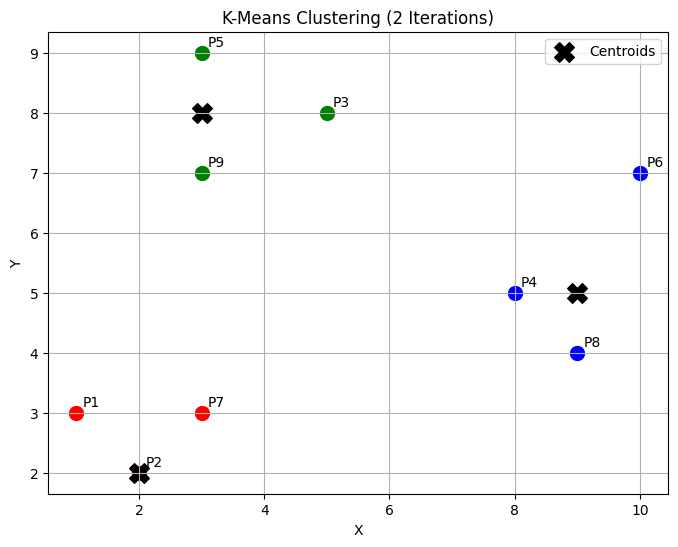

In [6]:
# Q1. Plot points, centroids, labels
colors = ['r','g','b']
plt.figure(figsize=(8,6))

for i, point in enumerate(points):
    plt.scatter(point[0], point[1], color=colors[clusters[i]], s=100)
    plt.text(point[0]+0.1, point[1]+0.1, point_labels[i], fontsize=10)

plt.scatter(centroids[:,0], centroids[:,1], color='k', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering (2 Iterations)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Q2. Import scikit-learn
from sklearn.cluster import KMeans



K=2
Cluster counts: [3 6]
Centroids:
 [[9.         5.33333333]
 [2.83333333 5.33333333]]


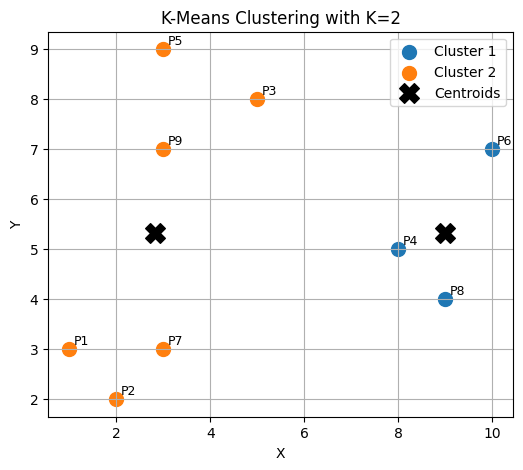


K=3
Cluster counts: [3 3 3]
Centroids:
 [[9.         5.33333333]
 [3.66666667 8.        ]
 [2.         2.66666667]]


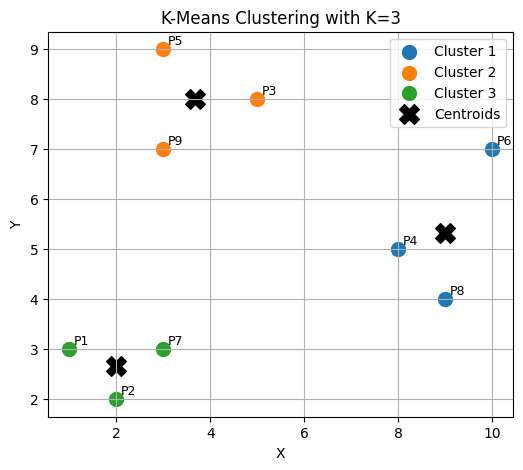


K=4
Cluster counts: [2 3 3 1]
Centroids:
 [[ 8.5         4.5       ]
 [ 3.66666667  8.        ]
 [ 2.          2.66666667]
 [10.          7.        ]]


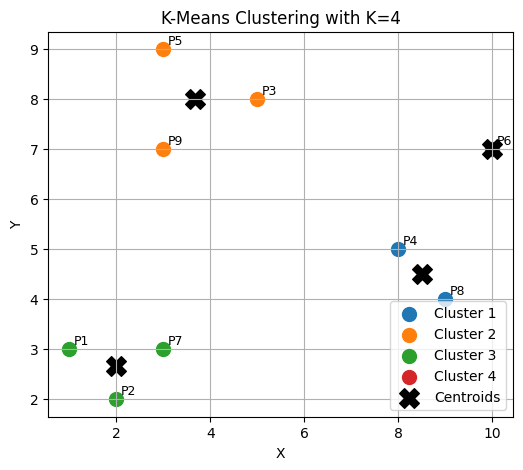

In [8]:
# Q2. Define K values
K_values = [2,3,4]

for K in K_values:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(points)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    
    print(f"\nK={K}")
    print("Cluster counts:", np.bincount(labels))
    print("Centroids:\n", centroids)
    
    # Plot
    plt.figure(figsize=(6,5))
    for i in range(K):
        cluster_points = points[labels==i]
        plt.scatter(cluster_points[:,0], cluster_points[:,1], label=f'Cluster {i+1}', s=100)
    plt.scatter(centroids[:,0], centroids[:,1], color='k', marker='X', s=200, label='Centroids')
    
    for i, label in enumerate(point_labels):
        plt.text(points[i,0]+0.1, points[i,1]+0.1, label, fontsize=9)
    
    plt.title(f"K-Means Clustering with K={K}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.show()


In [9]:
# Q3. Add P10
points_new = np.vstack([points, [6,2]])
point_labels_new = point_labels + ['P10']
K = 3

kmeans_new = KMeans(n_clusters=K, random_state=42)
kmeans_new.fit(points_new)
labels_new = kmeans_new.labels_
centroids_new = kmeans_new.cluster_centers_

# Print which cluster P10 joins
print("Cluster assignments:", labels_new)
print("P10 joins Cluster:", labels_new[-1])
print("New centroids:\n", centroids_new)


Cluster assignments: [1 1 2 0 2 0 1 0 2 1]
P10 joins Cluster: 1
New centroids:
 [[9.         5.33333333]
 [3.         2.5       ]
 [3.66666667 8.        ]]


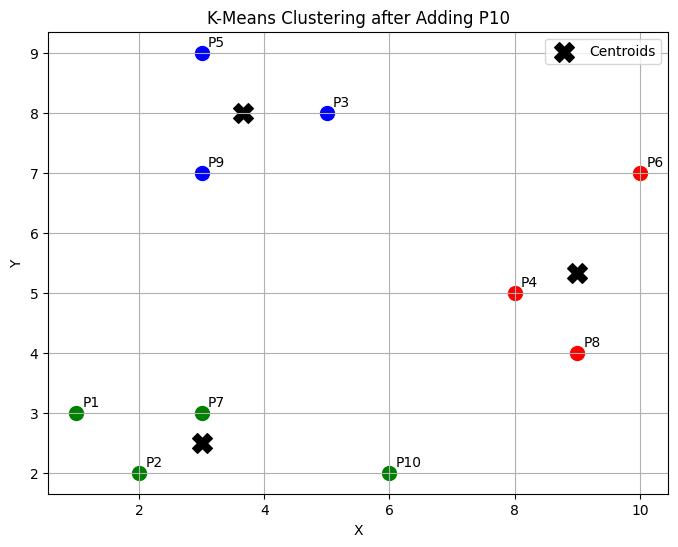

In [10]:
# Q3. Plot new clusters
plt.figure(figsize=(8,6))
colors = ['r','g','b']
for i, point in enumerate(points_new):
    plt.scatter(point[0], point[1], color=colors[labels_new[i]], s=100)
    plt.text(point[0]+0.1, point[1]+0.1, point_labels_new[i], fontsize=10)

plt.scatter(centroids_new[:,0], centroids_new[:,1], color='k', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering after Adding P10")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Q4. Compute distance table
initial_centroids = np.array([[3,3],[3,7],[9,4]])
distance_table = []

for i, point in enumerate(points):
    dist = [euclidean_distance(point, c) for c in initial_centroids]
    assigned_cluster = np.argmin(dist) + 1  # +1 for Cluster numbering
    distance_table.append([point_labels[i]] + dist + [assigned_cluster])

# Print distance table
import pandas as pd
df = pd.DataFrame(distance_table, columns=['Point','Dist_C1','Dist_C2','Dist_C3','Assigned Cluster'])
print(df)


  Point   Dist_C1   Dist_C2   Dist_C3  Assigned Cluster
0    P1  2.000000  4.472136  8.062258                 1
1    P2  1.414214  5.099020  7.280110                 1
2    P3  5.385165  2.236068  5.656854                 2
3    P4  5.385165  5.385165  1.414214                 3
4    P5  6.000000  2.000000  7.810250                 2
5    P6  8.062258  7.000000  3.162278                 3
6    P7  0.000000  4.000000  6.082763                 1
7    P8  6.082763  6.708204  0.000000                 3
8    P9  4.000000  0.000000  6.708204                 2


In [12]:
# Q4. Compute new centroids after first iteration
clusters_first_iter = df['Assigned Cluster'].values - 1  # 0-indexed
new_centroids = []
for i in range(3):
    cluster_points = points[clusters_first_iter==i]
    new_centroids.append(cluster_points.mean(axis=0))
new_centroids = np.array(new_centroids)
print("New centroids after 1st iteration:\n", new_centroids)


New centroids after 1st iteration:
 [[2.         2.66666667]
 [3.66666667 8.        ]
 [9.         5.33333333]]


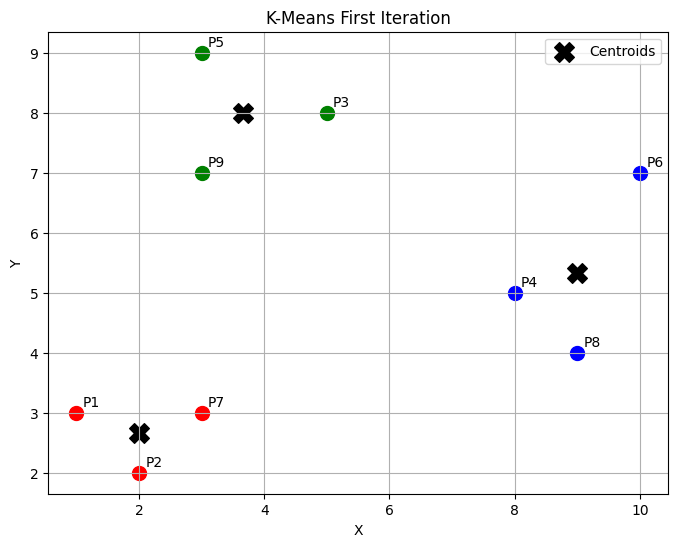

In [13]:
# Q4. Plot first iteration clusters
plt.figure(figsize=(8,6))
colors = ['r','g','b']
for i, point in enumerate(points):
    cluster = clusters_first_iter[i]
    plt.scatter(point[0], point[1], color=colors[cluster], s=100)
    plt.text(point[0]+0.1, point[1]+0.1, point_labels[i], fontsize=10)

plt.scatter(new_centroids[:,0], new_centroids[:,1], color='k', marker='X', s=200, label='Centroids')
plt.title("K-Means First Iteration")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()
